Import Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

# Load and preprocess the dataset
#dataset = pd.read_csv("./text_speech_index.csv", delimiter=";")
dataset = pd.read_csv("./augmented_train_dataset4.csv", delimiter=",")
# Convert the list into a DataFrame
df = pd.DataFrame(dataset, columns=['Utterance','Emotion'])

# Replace NaN values in 'emotion_in_tweet_is_directed_at' column with a string
replacement_string = "None"
df['Emotion'].fillna(replacement_string, inplace=True)

class_to_remove = 'None'

# Remove rows where 'Class' column contains the class to remove
df = df[df['Emotion'] != class_to_remove]
#df = df[df['Emotion'] != "neutral"]

class_counts = df['Emotion'].value_counts()
#print(df)
print(class_counts)


Emotion
fear        3880
joy         3696
disgust     3600
sadness     3334
surprise    3320
neutral     3286
anger       3116
Name: count, dtype: int64


In [6]:
print(df['Utterance'])

0        I must say it's nice to see you back on your f...
1                And I swear I’ll do a really good labour.
2            Don’t, don’t just dismiss this so degenerate.
3        No-no-no. I don't have a son named Jordie. We ...
4                                                     Bye!
                               ...                        
24227                              Oh!  okeh, hmm, ok, um,
24228                                         I adore you!
24229                                                Yeah?
24230          Oh, can I throw up in Ohio my diaper genie?
24231    Entire right here he occurs. I’m gonna do this...
Name: Utterance, Length: 24232, dtype: object


Prepare Data

In [17]:
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def contracts(text):
    import contractions
    expanded_text = contractions.fix(text)
    return expanded_text

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


X = df['Utterance']
print(X)
X = X.apply(lambda x:contracts(x))
print(X)
X = X.apply(lambda x:remove_punctuation(x))
print(X)
X = X.apply(lambda x: x.lower())
print(X.head)
X = X.apply(lambda x: tokenization(x))
print(X.head)
X = X.apply(lambda x:lemmatizer(x))
print(X.head)


0        I must say it's nice to see you back on your f...
1                And I swear I’ll do a really good labour.
2            Don’t, don’t just dismiss this so degenerate.
3        No-no-no. I don't have a son named Jordie. We ...
4                                                     Bye!
                               ...                        
24227                              Oh!  okeh, hmm, ok, um,
24228                                         I adore you!
24229                                                Yeah?
24230          Oh, can I throw up in Ohio my diaper genie?
24231    Entire right here he occurs. I’m gonna do this...
Name: Utterance, Length: 24232, dtype: object
0        I must say it is nice to see you back on your ...
1              And I swear I will do a really good labour.
2          Do not, do not just dismiss this so degenerate.
3        No-no-no. I do not have a son named Jordie. We...
4                                                     Bye!
          

In [18]:
def preprocess(X):
    print(X.head)
    X = X.apply(lambda x:contracts(x))
    print(X)
    X = X.apply(lambda x:remove_punctuation(x))
    print(X)
    X = X.apply(lambda x: x.lower())
    print(X.head)
    X = X.apply(lambda x: tokenization(x))
    print(X.head)
    #X = X.apply(lambda x:remove_stopwords(x))
    print(X.head)
    X = X.apply(lambda x:lemmatizer(x))
    print(X.head)

    flattened_data = [item for sublist in X for item in sublist]

    return flattened_data

In [15]:
type(X)

pandas.core.series.Series

In [12]:
print(X)

[['i', 'must', 'say', 'it', 'is', 'nice', 'to', 'see', 'you', 'back', 'on', 'your', 'foot'], ['and', 'i', 'swear', 'i', 'will', 'do', 'a', 'really', 'good', 'labour'], ['do', 'not', 'do', 'not', 'just', 'dismiss', 'this', 'so', 'degenerate'], ['nonono', 'i', 'do', 'not', 'have', 'a', 'son', 'named', 'jordie', 'we', 'all', 'agreed', 'my', 'son', 'behalf', 'is', 'jamie'], ['bye'], ['no', 'so', 'you', 'are', 'saying', 'soh', 'that', 'if', 'i', 'called', 'it', 'it', 'would', 'not', 'ring'], ['so', 'place', 'this', 'overpriced'], ['yknow', 'she', 'would', 'tell', 'no', 'but', 'here', 'we', 'are'], ['okay', 'goodgood', 'for', 'you'], ['bye', 'chandler', 'iodine', 'miss', 'you', 'already'], ['really'], ['oh', 'god', 'my', 'eye'], ['it', 'turn', 'out', 'they', 'fired', 'the', 'head', 'lunch', 'jefe', 'and', 'guess', 'who', 'got', 'the', 'job'], ['actually', 'i', 'think', 'this', 'apartment', 'sully', 'the', 'serious', 'name', 'of', 'crap'], ['hey', 'how', 'is', 'my', 'pal', 'toby', 'doing', 't

In [19]:
new_x=[]

for x in X.values:
    print(x)
    new_x.append(x)

print(new_x)
X=new_x
print(len(X))

['i must say it is nice to see you back on your feet']
['and i swear i will do a really good labour']
['do not do not just dismiss this so degenerate']
['nonono i do not have a son named jordie we all agreed my sons behalf is jamie']
['bye']
['no so you are saying soh that if i called it it would not ring']
['so place this overpriced']
['yknow she would tell no but here we are']
['okay goodgood for you']
['bye chandler   iodine miss you already']
['really']
['oh god my eye']
['it turns out they fired the head lunch jefe and guess who got the job']
['actually i think this apartment sullies the serious name of crap']
['hey how is my pal toby doing today']
['but ane got to act with a robot pheebs andand i do not know anything about technology']
['no umm okay but while you dial leaving me exhibition you the features of my new ringing handbag  oh it does work']
['enjoin you tell her mariner i cannot do it']
['oh boy i just cannot ticker it is scary']
['hohohold on a sec there mr kissey']
['

In [20]:
flattened_data = [item for sublist in X for item in sublist]
print(len(flattened_data))

24232


In [21]:
X=flattened_data

In [22]:
# Split the dataset into input (tweet_text) and output (emotion_in_tweet_is_directed_at, is_there_an_emotion_directed_at_a_brand_or_product)
#X = df['Utterance'].values
y = df[['Emotion']].values

# Replace missing values with empty strings
X = np.where(pd.isnull(X), '', X)
print(X)
# Tokenize the input data
num_words = 10000 # this means 10000 unique words can be taken 
tokenizer = Tokenizer(num_words,lower=True)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

['i must say it is nice to see you back on your feet'
 'and i swear i will do a really good labour'
 'do not do not just dismiss this so degenerate' ... 'yeah'
 'oh can i throw up in ohio my diaper genie'
 'entire right here he occurs i am going to do this i am going to tell him i am going to be strong']


In [23]:
print(X)

[[   0    0    0 ...   30   41 2295]
 [   0    0    0 ...   60   90 4545]
 [   0    0    0 ...   19   25 5493]
 ...
 [   0    0    0 ...    0    0   39]
 [   0    0    0 ...   18 2022 2277]
 [   0    0    0 ...    3   32  647]]


In [24]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100')

In [25]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [26]:
df = pd.DataFrame(y)
class_counts = df.value_counts()
#print(df)
print(class_counts)


fear        3880
joy         3696
disgust     3600
sadness     3334
surprise    3320
neutral     3286
anger       3116
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder

# Convert the output labels to integers using label encoding
label_encoders = []
y_encoded = []
for i in range(y.shape[1]):
    label_encoder = LabelEncoder()
    y_encoded.append(label_encoder.fit_transform(y[:, i]))
    label_encoders.append(label_encoder)

# Convert the encoded output labels into categorical form
y_categorical = [to_categorical(y_label) for y_label in y_encoded]
print(y_categorical)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)]


Split into training and test sets

In [73]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical[0], test_size=0.1, stratify=y_categorical[0])
#X_test, X_val, y_test, y_val= train_test_split(X_val, y_val, train_size=0.107)#0.071)#0.107)#0.19)

In [28]:
X_train= X
y_train = y_categorical[0]
print(X_train)
print(y_train)
print(len(X_train[0]))

[[   0    0    0 ...   30   41 2295]
 [   0    0    0 ...   60   90 4545]
 [   0    0    0 ...   19   25 5493]
 ...
 [   0    0    0 ...    0    0   39]
 [   0    0    0 ...   18 2022 2277]
 [   0    0    0 ...    3   32  647]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
75


In [29]:
max_sequence_length = len(X_train[0])

In [30]:
dataset = pd.read_csv('./validation_data.csv', delimiter=",")
df = pd.DataFrame(dataset, columns=['Utterance','Emotion'])

replacement_string = "None"
df['Emotion'].fillna(replacement_string, inplace=True)

class_to_remove = 'None'
df = df[df['Emotion'] != class_to_remove]
#df = df[df['Emotion'] != 'neutral']

X_val = df['Utterance']
y_val = df[['Emotion']].values
X_val = preprocess(X_val)
# Replace missing values with empty strings
X_val = np.where(pd.isnull(X_val), '', X_val)

# Tokenize the input data
num_words = 10000 # this means 10000 unique words can be taken 
tokenizer = Tokenizer(num_words,lower=True)
tokenizer.fit_on_texts(X_val)
vocab_size = len(tokenizer.word_index) + 1
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=max_sequence_length)

# Convert the output labels to integers using label encoding
label_encoders = []
y_encoded = []
for i in range(y.shape[1]):
    label_encoder = LabelEncoder()
    y_encoded.append(label_encoder.fit_transform(y_val[:, i]))
    label_encoders.append(label_encoder)

# Convert the encoded output labels into categorical form
y_val = [to_categorical(y_label) for y_label in y_encoded]
y_val = y_val[0]

print(X_val)
print(y_val)
print(len(y_val[0]))
print(len(X_val[0]))

<bound method NDFrame.head of 0       Reset button, reset button, where is there a r...
1       I haven't... I haven't even thought about the ...
2                                         Okay, okay, bye
3       I'm not crazy, right? I mean, it was never lik...
4                              What?! No! It was my idea!
                              ...                        
1991    Wow! It's huge! It's so much bigger than the c...
1992                Yeah, I mean I was up sick all night.
1993                                    Yeah, I got that.
1994                  Fraid so. Brown hair, green eyes...
1995    You guys got anything to eat? I just went down...
Name: Utterance, Length: 1996, dtype: object>
0       Reset button, reset button, where is there a r...
1       I have not... I have not even thought about th...
2                                         Okay, okay, bye
3       I am not crazy, right? I mean, it was never li...
4                              What?! No! It was my id

In [31]:
dataset = pd.read_csv('./test_data.csv', delimiter=",")
df = pd.DataFrame(dataset, columns=['Utterance','Emotion'])

replacement_string = "None"
df['Emotion'].fillna(replacement_string, inplace=True)

class_to_remove = 'None'
df = df[df['Emotion'] != class_to_remove]
#df = df[df['Emotion'] != 'neutral']

X_test = df['Utterance'].values
y_test = df[['Emotion']].values


# Tokenize the input data
num_words = 10000 # this means 10000 unique words can be taken 
tokenizer = Tokenizer(num_words,lower=True)
tokenizer.fit_on_texts(X_test)
vocab_size = len(tokenizer.word_index) + 1
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Convert the output labels to integers using label encoding
label_encoders = []
y_encoded = []
for i in range(y.shape[1]):
    label_encoder = LabelEncoder()
    y_encoded.append(label_encoder.fit_transform(y_test[:, i]))
    label_encoders.append(label_encoder)

# Convert the encoded output labels into categorical form
y_test = [to_categorical(y_label) for y_label in y_encoded]
y_test = y_test[0]

print(X_test)
print(y_test)

[[   0    0    0 ...    0   34   72]
 [   0    0    0 ...    0    0   22]
 [   0    0    0 ...  324   12  423]
 ...
 [   0    0    0 ...   41   47 1563]
 [   0    0    0 ...    0    0 1564]
 [   0    0    0 ...   44  112  309]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [32]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

24232
1996
998


In [33]:
df = pd.DataFrame(y_train)
class_counts = df.value_counts()
#print(df)
print(class_counts)

0    1    2    3    4    5    6  
0.0  0.0  1.0  0.0  0.0  0.0  0.0    3880
          0.0  1.0  0.0  0.0  0.0    3696
     1.0  0.0  0.0  0.0  0.0  0.0    3600
     0.0  0.0  0.0  0.0  1.0  0.0    3334
                         0.0  1.0    3320
                    1.0  0.0  0.0    3286
1.0  0.0  0.0  0.0  0.0  0.0  0.0    3116
Name: count, dtype: int64


Build and Compile Model

In [34]:
class_number = y_categorical[0].shape[1]
print(y_categorical[0].shape[1])

7


In [35]:
print(vocab_size)

1565


In [36]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Dropout, Conv1D, TimeDistributed, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

# Define input layer
input_layer = Input(shape=(X.shape[1],))  # Assuming X is your input data with proper shape

# Define the embedding layer
embedding_layer = Embedding(input_dim=10000,
                            output_dim=100,
 weights = [gensim_weight_matrix],
                            trainable=False)(input_layer)

# Define the Bidirectional LSTM layer
bilstm_layer = Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2))(embedding_layer)

# Apply dropout
dropout_rate = 0.5  # You can adjust this rate as needed
bilstm_dropout = Dropout(dropout_rate)(bilstm_layer)

# Add a dense layer for classification (example: binary classification with one output unit)
output_layer = Dense(class_number, activation='softmax')(bilstm_dropout)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with an appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
EMBEDDING_DIM = 100
DROPOUT_RATE = 0.2
model = Sequential()
model.add(Embedding(input_dim = num_words,
 output_dim = EMBEDDING_DIM,
 input_length= X.shape[1],
 weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(DROPOUT_RATE))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(DROPOUT_RATE))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(DROPOUT_RATE ))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(class_number, activation = 'softmax'))

optimizer = Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer,metrics = 'accuracy')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

best_model_file = './LSTM_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

best_rnn_model_file = './RNN_aug_best_weights.h5'
best_rnn_model = ModelCheckpoint(best_rnn_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [39]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [40]:
early_stops = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

Training

In [41]:
# Train the model
lstm_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1,
                              callbacks = [best_model, reduce_lr, early_stops])

# Evaluate the model
#_, accuracy = model.evaluate(X_test, y_test)
#print('Accuracy: %.2f' % (accuracy * 100))

Epoch 1/100
758/758 [==============================] - ETA: 0s - loss: 1.8445 - accuracy: 0.2564
Epoch 1: val_accuracy improved from -inf to 0.13677, saving model to .\LSTM_aug_best_weights.h5


g:\8thSemester\TA-1\.conda\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


758/758 [==============================] - 416s 540ms/step - loss: 1.8445 - accuracy: 0.2564 - val_loss: 1.9492 - val_accuracy: 0.1368 - lr: 1.0000e-04
Epoch 2/100
758/758 [==============================] - ETA: 0s - loss: 1.7174 - accuracy: 0.3324
Epoch 2: val_accuracy did not improve from 0.13677
758/758 [==============================] - 363s 478ms/step - loss: 1.7174 - accuracy: 0.3324 - val_loss: 2.0838 - val_accuracy: 0.1283 - lr: 1.0000e-04
Epoch 3/100
758/758 [==============================] - ETA: 0s - loss: 1.6410 - accuracy: 0.3690
Epoch 3: val_accuracy improved from 0.13677 to 0.15882, saving model to .\LSTM_aug_best_weights.h5
758/758 [==============================] - 452s 596ms/step - loss: 1.6410 - accuracy: 0.3690 - val_loss: 2.0809 - val_accuracy: 0.1588 - lr: 1.0000e-04
Epoch 4/100
758/758 [==============================] - ETA: 0s - loss: 1.5733 - accuracy: 0.3997
Epoch 4: val_accuracy improved from 0.15882 to 0.20140, saving model to .\LSTM_aug_best_weights.h5
758/

Statistic

In [1]:
from matplotlib import pyplot as plt

def show_accuracy(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc))

    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs, acc, 'r', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [2]:
from matplotlib import pyplot as plt

def show_loss(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc))

    fig2 = plt.figure(figsize=(14,7))
    plt.plot(epochs, loss, 'r', label="Training Loss")
    plt.plot(epochs, val_loss, 'b', label="Validation Loss")
    plt.legend(loc='upper right')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and validation loss')
    plt.show()

In [3]:
show_accuracy(lstm_history)

NameError: name 'lstm_history' is not defined

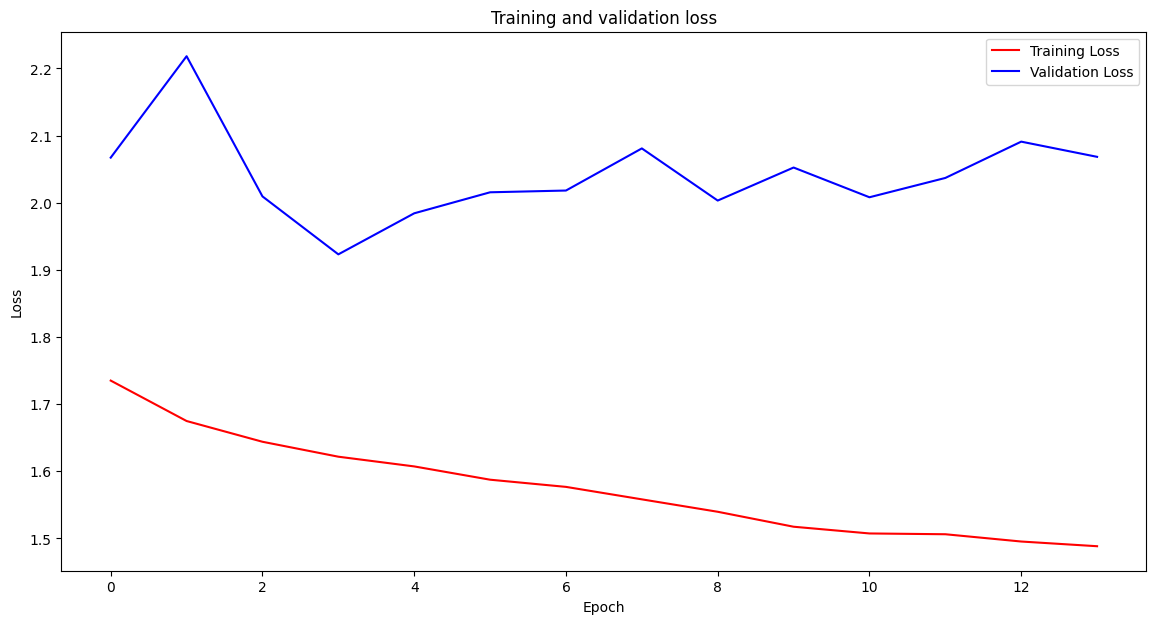

In [ ]:
show_loss(lstm_history)

Testing

In [45]:
# Make predictions on the test data
predictions = model.predict(X_test)
print(len(X_test))
# Decode the predictions
predicted_labels = [np.argmax(pred) for pred in predictions]

# Decode the predicted labels using the label encoders
decoded_labels = label_encoders[0].inverse_transform(predicted_labels)

""" # Print the predicted labels
for label in decoded_labels:
    print('{}'.format(label)) """

32/32 [==============================] - 3s 75ms/step
998


" # Print the predicted labels\nfor label in decoded_labels:\n    print('{}'.format(label)) "

In [46]:
# Convert the true label to array
true_array = np.argmax(y_test, axis=1)
#print(true_array)
print(len(y_test))

#Convert predictions to array
predict_array = np.array(predicted_labels)
#print(predict_array)



""" # Print the predicted labels
for i in range(len(predict_array)):
    print('{} {}'.format(predict_array[i], array_1d[i])) """

998


" # Print the predicted labels\nfor i in range(len(predict_array)):\n    print('{} {}'.format(predict_array[i], array_1d[i])) "

Plot Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(true_array, predict_array)
print(conf_mat)

# Get the total values on the diagonal
diagonal_values = np.diag(conf_mat)

# Compute the sum of diagonal values
total_diagonal = np.sum(diagonal_values)

print("Total diagonal values:", total_diagonal)


[[  8   8  21  17  31  17  12]
 [  4   2   4   4   5   5   2]
 [  1   1   4   1   2   3   6]
 [ 21  10  28  26  31  34  16]
 [ 57  27  83  64 111  69  68]
 [  8   4  12   9   8  10  11]
 [ 11   7  19  11  36  16  33]]
Total diagonal values: 194


In [48]:
import itertools
from  matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
    else:
        cm=cm


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
     

In [49]:
classes = label_encoders[0].classes_
classes

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype=object)

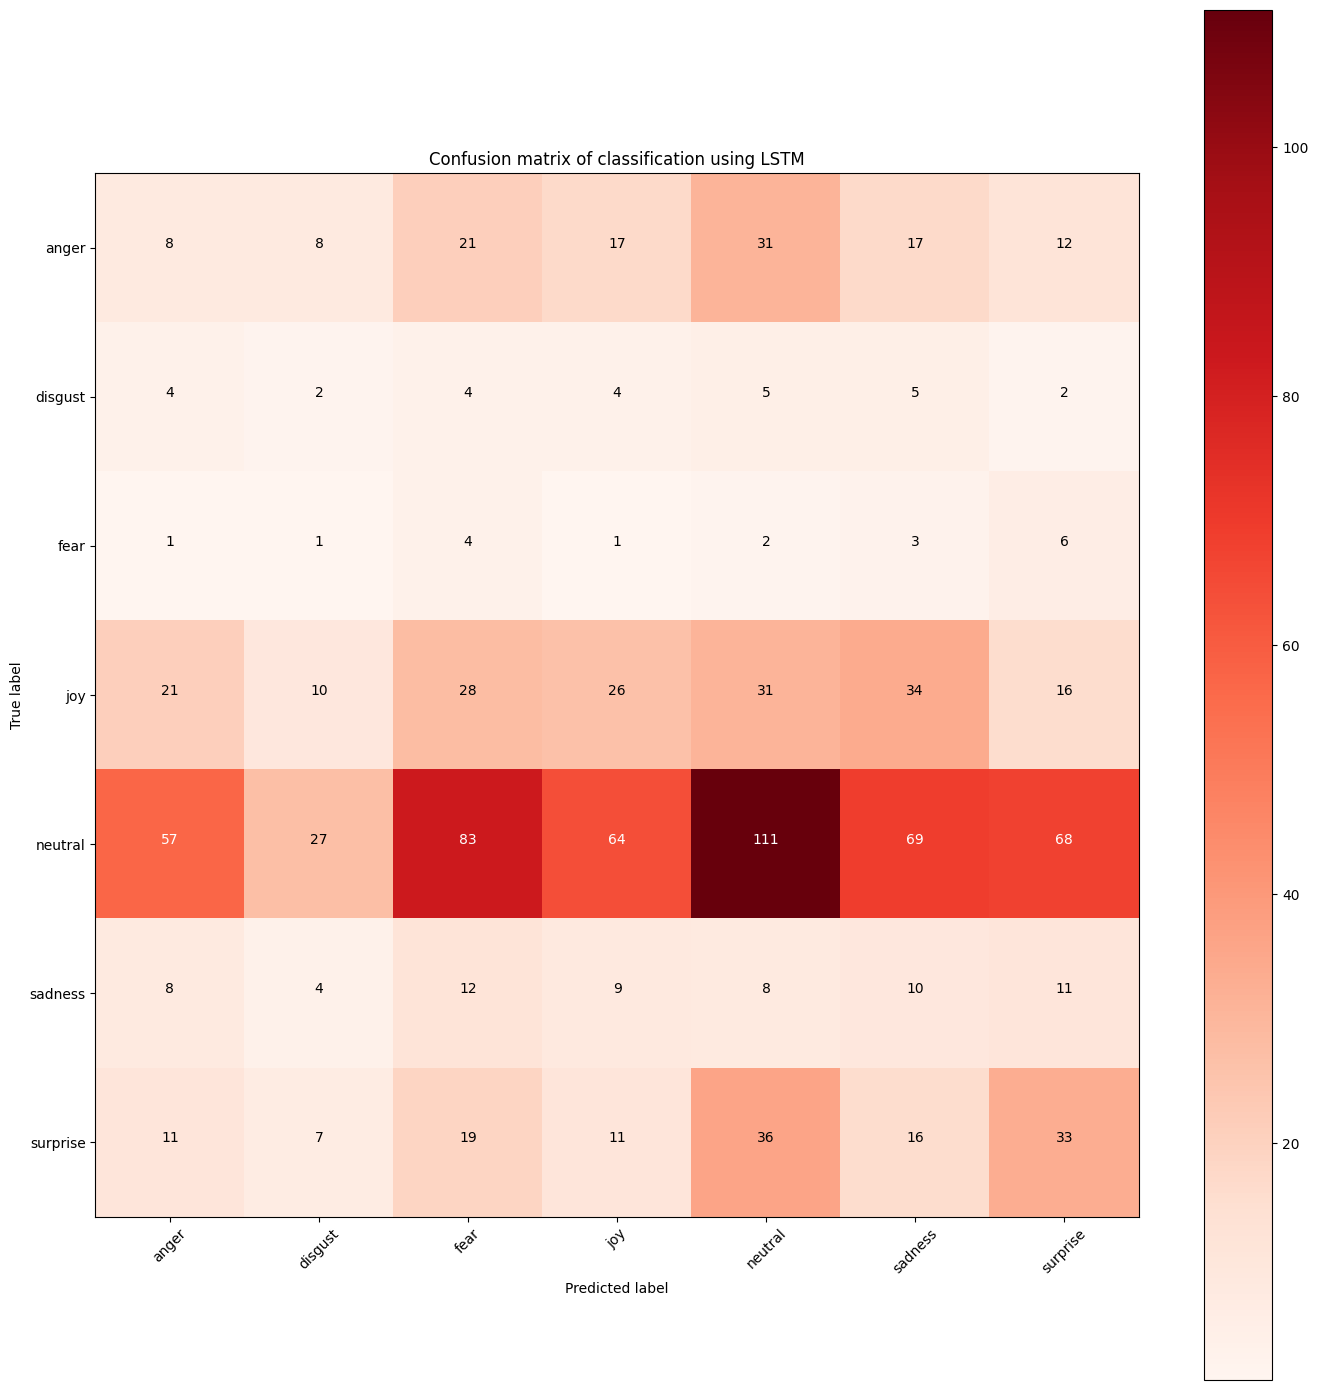

In [50]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(14,14))
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix of classification using LSTM')
plt.show()

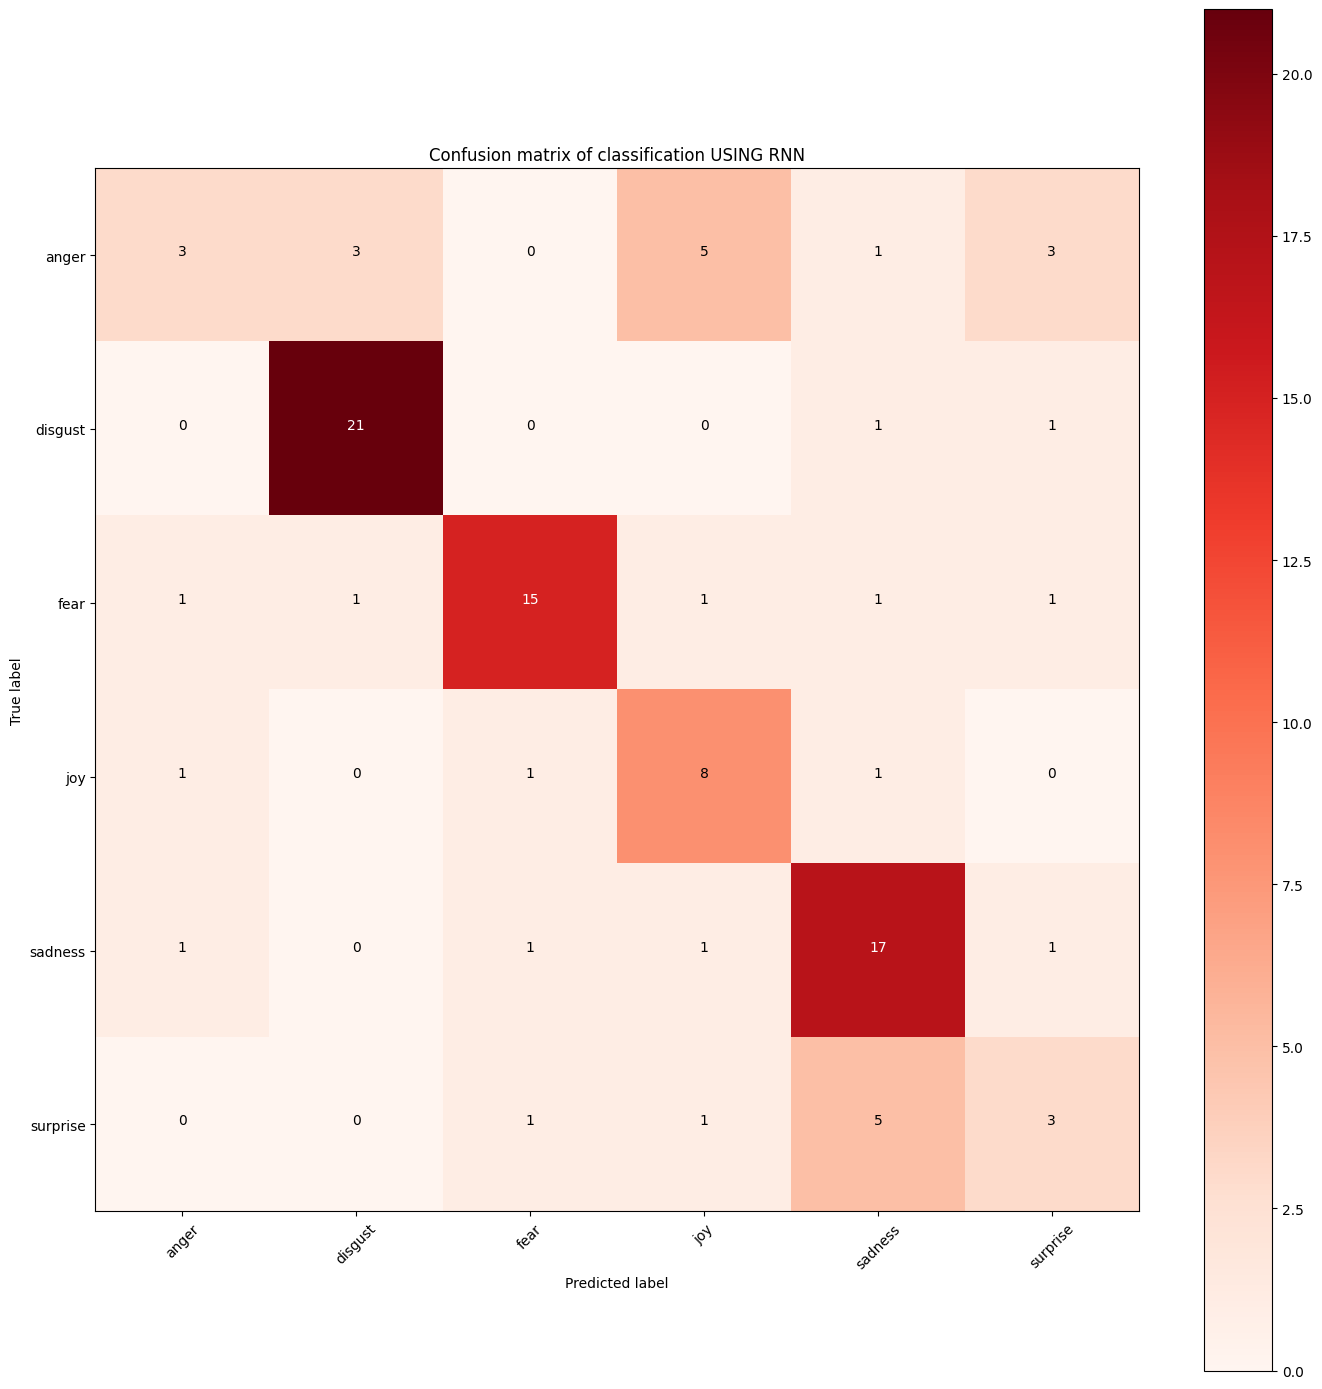

In [ ]:
np.set_printoptions(precision=2)

fig1 = plt.figure(figsize=(14,14))
plot_confusion_matrix(rnn_conf_mat, classes=classes, title='Confusion matrix of classification USING RNN')
plt.show()